<a href="https://colab.research.google.com/github/joaojulio/Kaggle-Projects/blob/master/TitanicKaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Data Dictionary
[Kaggle Titanic data dicitionary](https://www.kaggle.com/c/titanic/data)

##Imports

In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('/content/drive/My Drive/Kaggle/Titanic/train.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##DAE

In [57]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     \ 46.3MB 602kB/s
     |████████████████████████████████| 61kB 3.6MB/s 
     |████████████████████████████████| 604kB 8.1MB/s 
     |████████████████████████████████| 3.1MB 10.6MB/s 
     |████████████████████████████████| 71kB 9.0MB/s 
     |████████████████████████████████| 296kB 28.9MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.8.0-py2.py3-none-any.whl size=259932 sha256=d103aec33376a38203567c1856f58e6d8babbcbb2864c883ace8af2666022559
  Stored in directory: /tmp/pip-ephem-wheel-cache-64u1yg9v/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
  Created wheel for confuse: filename=confuse-1.1.0-cp36-none-any.whl size=17574 sha256=c336922feb140c8c68eccf881ffb1a3f1cdea294d97bb1b95e6b03013140f24e
  Stored in directory: /root/.cache/pip/wheels/f6/8b/23/41a1b516f6d8d4cc81f5bdb55394a47cdbe9659c53668d3c9e
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=aad9760ca8c2f6badd31b96367d0d64f1a25d69188073cfe389d1

In [5]:
from pandas_profiling import ProfileReport

In [6]:
profile = ProfileReport(df, title='Report - Titanic profile', html={'style':{'full_width':True}})

In [ ]:
profile

In [ ]:
profile.to_file(output_file='ReportTitanic-01.html')

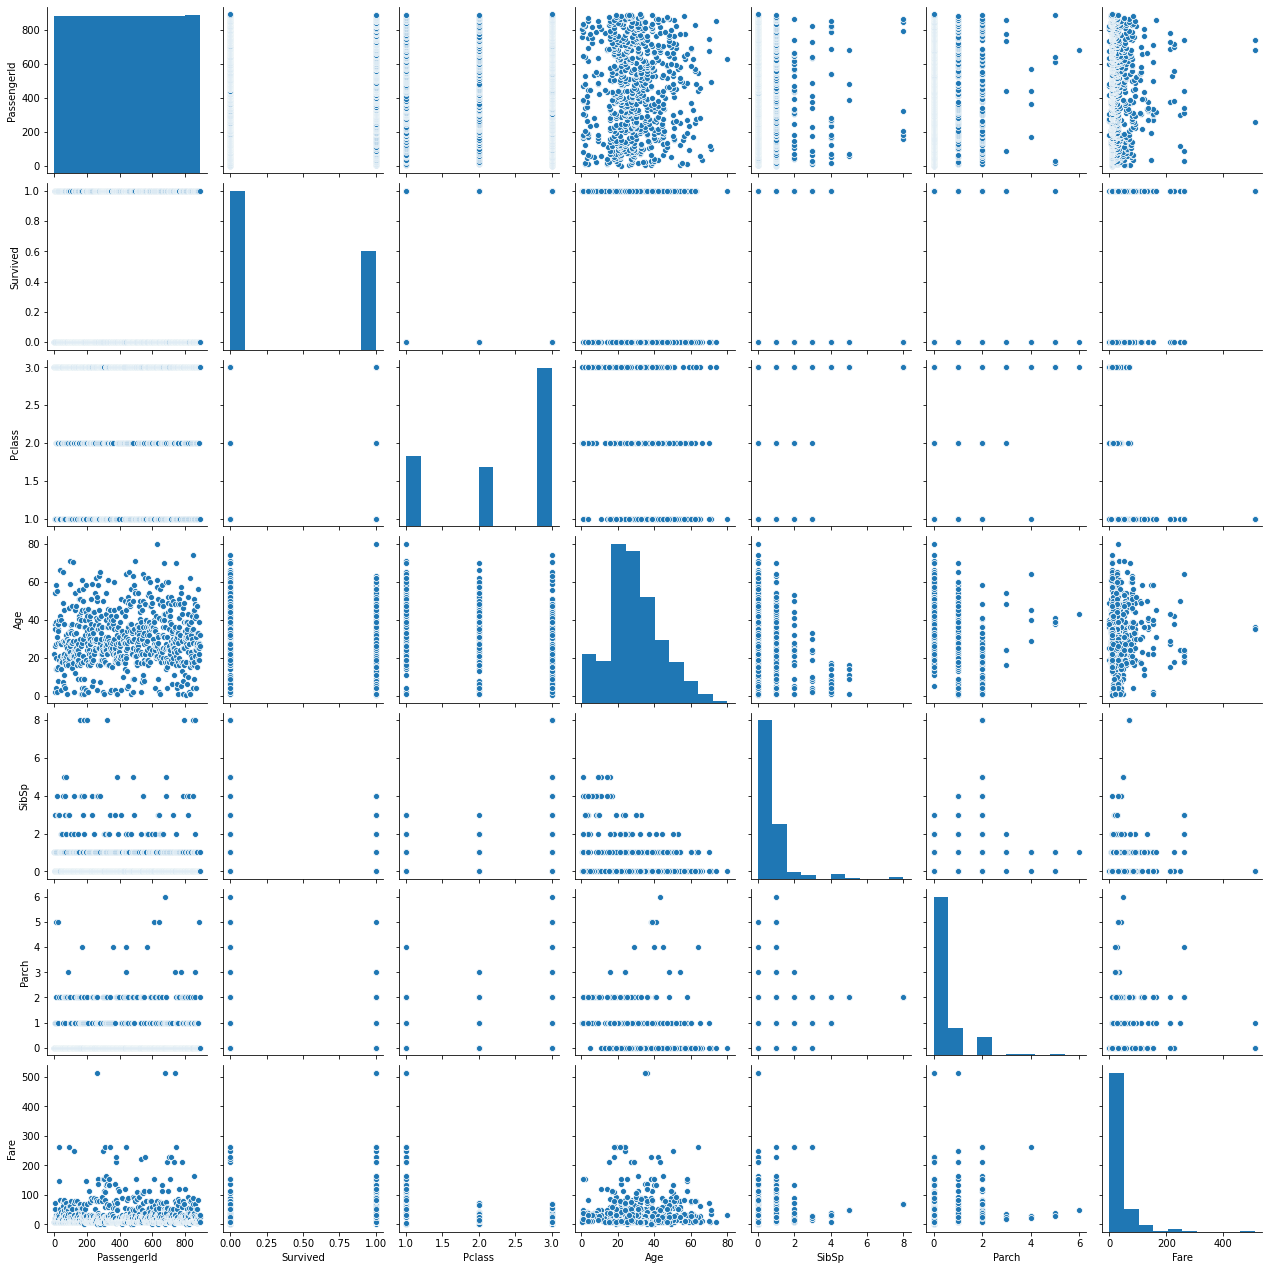

In [ ]:
sns.pairplot(df)

##First Impressions

Observations:
1. Cabin with too many missing values (>=70%);
2. Around 20% of missing values in Age;
3. More than half of passengers are in PClass 3 (55%);
4. 64.8% are male;
5. 20-40 years: high concentration;
6. Around 70% of passengers don't have relatives (68.2% of zeros in SibSp);
7. There's no much families aboord (around 76% of zeros in Parch).
8. 342 survivers (38.4%)

Correlations with survived
1. Fare
2. Pclass
3. Sex


##Dealing with missing values

###Age

In [ ]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [8]:
trainframe = df.drop(['Name','SibSp','Parch','Ticket'],axis=1)

In [33]:
trainframe.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked
0,1,0,3,male,22.0,7.2500,NaN,S
1,2,1,1,female,38.0,71.2833,C85,C
2,3,1,3,female,26.0,7.9250,NaN,S
3,4,1,1,female,35.0,53.1000,C123,S
4,5,0,3,male,35.0,8.0500,NaN,S


In [9]:
trainframe.groupby('Pclass')['Age'].mean().round(0)

Pclass
1    38.0
2    30.0
3    25.0
Name: Age, dtype: float64

In [ ]:
trainframe['Age'].isnull().sum()

177

In [ ]:
trainframe[trainframe['Pclass']==1]['Age'].isnull().sum()

30

In [ ]:
trainframe[trainframe['Pclass']==2]['Age'].isnull().sum()

11

In [ ]:
trainframe[trainframe['Pclass']==3]['Age'].isnull().sum()

136

In [ ]:
fillingAgeTest = trainframe[(trainframe['Pclass']==2) & (trainframe['Age'].isnull())]

In [ ]:
fillingAgeTest

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked
17,18,1,2,male,NaN,13.0000,NaN,S
181,182,0,2,male,NaN,15.0500,NaN,C
277,278,0,2,male,NaN,0.0000,NaN,S
303,304,1,2,female,NaN,12.3500,E101,Q
413,414,0,2,male,NaN,0.0000,NaN,S
466,467,0,2,male,NaN,0.0000,NaN,S
481,482,0,2,male,NaN,0.0000,NaN,S
547,548,1,2,male,NaN,13.8625,NaN,C
596,597,1,2,female,NaN,33.0000,NaN,S
674,675,0,2,male,NaN,0.0000,NaN,S


In [10]:
pclassAgeAv = trainframe.groupby('Pclass')['Age'].mean().round(0)

In [ ]:
pclassAgeAv[2]

30.0

In [11]:
def fill_age_missing(Pclass,Age):
  if np.isnan(Age):
    return pclassAgeAv[Pclass]
  else:
    return Age

In [ ]:
fillingAgeTest['Age'] = fillingAgeTest.apply(lambda x: fill_age_missing(x['Pclass'], x['Age']),axis=1)

In [ ]:
fillingAgeTest

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked
17,18,1,2,male,30.0,13.0000,NaN,S
181,182,0,2,male,30.0,15.0500,NaN,C
277,278,0,2,male,30.0,0.0000,NaN,S
303,304,1,2,female,30.0,12.3500,E101,Q
413,414,0,2,male,30.0,0.0000,NaN,S
466,467,0,2,male,30.0,0.0000,NaN,S
481,482,0,2,male,30.0,0.0000,NaN,S
547,548,1,2,male,30.0,13.8625,NaN,C
596,597,1,2,female,30.0,33.0000,NaN,S
674,675,0,2,male,30.0,0.0000,NaN,S


In [12]:
trainframe['Age'] = trainframe.apply(lambda x: fill_age_missing(x['Pclass'], x['Age']),axis=1)

In [13]:
trainframe.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
Fare             0
Cabin          687
Embarked         2
dtype: int64

###Cabin

In [ ]:
trainframe['Cabin'].nunique()

147

In [ ]:
trainframe['Cabin'].sort_values().unique()

array(['A10', 'A14', 'A16', 'A19', 'A20', 'A23', 'A24', 'A26', 'A31',
       'A32', 'A34', 'A36', 'A5', 'A6', 'A7', 'B101', 'B102', 'B18',
       'B19', 'B20', 'B22', 'B28', 'B3', 'B30', 'B35', 'B37', 'B38',
       'B39', 'B4', 'B41', 'B42', 'B49', 'B5', 'B50', 'B51 B53 B55',
       'B57 B59 B63 B66', 'B58 B60', 'B69', 'B71', 'B73', 'B77', 'B78',
       'B79', 'B80', 'B82 B84', 'B86', 'B94', 'B96 B98', 'C101', 'C103',
       'C104', 'C106', 'C110', 'C111', 'C118', 'C123', 'C124', 'C125',
       'C126', 'C128', 'C148', 'C2', 'C22 C26', 'C23 C25 C27', 'C30',
       'C32', 'C45', 'C46', 'C47', 'C49', 'C50', 'C52', 'C54', 'C62 C64',
       'C65', 'C68', 'C7', 'C70', 'C78', 'C82', 'C83', 'C85', 'C86',
       'C87', 'C90', 'C91', 'C92', 'C93', 'C95', 'C99', 'D', 'D10 D12',
       'D11', 'D15', 'D17', 'D19', 'D20', 'D21', 'D26', 'D28', 'D30',
       'D33', 'D35', 'D36', 'D37', 'D45', 'D46', 'D47', 'D48', 'D49',
       'D50', 'D56', 'D6', 'D7', 'D9', 'E10', 'E101', 'E12', 'E121',
       'E17',

In [ ]:
trainframe[trainframe['Cabin']=='T']

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked
339,340,0,1,male,45.0,35.5,T,S


In [ ]:
trainframe['Cabin'][303][0]

'E'

In [14]:
trainframe['LetterCabin'] = trainframe['Cabin'].str[0]

In [ ]:
trainframe.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,LetterCabin
0,1,0,3,male,22.0,7.2500,NaN,S,NaN
1,2,1,1,female,38.0,71.2833,C85,C,C
2,3,1,3,female,26.0,7.9250,NaN,S,NaN
3,4,1,1,female,35.0,53.1000,C123,S,C
4,5,0,3,male,35.0,8.0500,NaN,S,NaN


In [ ]:
trainframe.drop('Cabin', axis=1)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,LetterCabin
0,1,0,3,male,22.0,7.2500,S,NaN
1,2,1,1,female,38.0,71.2833,C,C
2,3,1,3,female,26.0,7.9250,S,NaN
3,4,1,1,female,35.0,53.1000,S,C
4,5,0,3,male,35.0,8.0500,S,NaN
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,13.0000,S,NaN
887,888,1,1,female,19.0,30.0000,S,B
888,889,0,3,female,25.0,23.4500,S,NaN
889,890,1,1,male,26.0,30.0000,C,C


In [13]:
trainframe.groupby('Pclass')['LetterCabin'].unique()

Pclass
1    [C, E, A, nan, B, D, T]
2             [nan, D, F, E]
3             [nan, G, F, E]
Name: LetterCabin, dtype: object

In [15]:
trainframe.drop(['LetterCabin', 'Cabin'], axis=1, inplace=True)

In [16]:
trainframe.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked
0,1,0,3,male,22.0,7.2500,S
1,2,1,1,female,38.0,71.2833,C
2,3,1,3,female,26.0,7.9250,S
3,4,1,1,female,35.0,53.1000,S
4,5,0,3,male,35.0,8.0500,S


In [15]:
trainframe.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       2
dtype: int64

In [17]:
trainframe = trainframe.dropna()

In [18]:
trainframe.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
dtype: int64

##Data PreProcessing

###Sex

In [19]:
maleGender = pd.get_dummies(trainframe['Sex'],drop_first=True)

In [20]:
trainframe = pd.concat([trainframe.drop('Sex',axis=1),maleGender], axis=1)

In [21]:
trainframe.head()

,PassengerId,Survived,Pclass,Age,Fare,Embarked,male
0,1,0,3,22.0,7.2500,S,1
1,2,1,1,38.0,71.2833,C,0
2,3,1,3,26.0,7.9250,S,0
3,4,1,1,35.0,53.1000,S,0
4,5,0,3,35.0,8.0500,S,1


###Embarked

In [22]:
portOfEmbarkation = pd.get_dummies(trainframe['Embarked'])

In [23]:
trainframe = pd.concat([trainframe.drop('Embarked',axis=1),portOfEmbarkation],axis=1)

In [24]:
trainframe.head()

,PassengerId,Survived,Pclass,Age,Fare,male,C,Q,S
0,1,0,3,22.0,7.2500,1,0,0,1
1,2,1,1,38.0,71.2833,0,1,0,0
2,3,1,3,26.0,7.9250,0,0,0,1
3,4,1,1,35.0,53.1000,0,0,0,1
4,5,0,3,35.0,8.0500,1,0,0,1


In [25]:
trainframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Age          889 non-null    float64
 4   Fare         889 non-null    float64
 5   male         889 non-null    uint8  
 6   C            889 non-null    uint8  
 7   Q            889 non-null    uint8  
 8   S            889 non-null    uint8  
dtypes: float64(2), int64(3), uint8(4)
memory usage: 45.1 KB


##Second Report

In [27]:
profileTwo = ProfileReport(trainframe, title='Second Report - Titanic profile', html={'style':{'full_width':True}})

In [28]:
profileTwo.to_file(output_file='ReportTitanic-02.html')

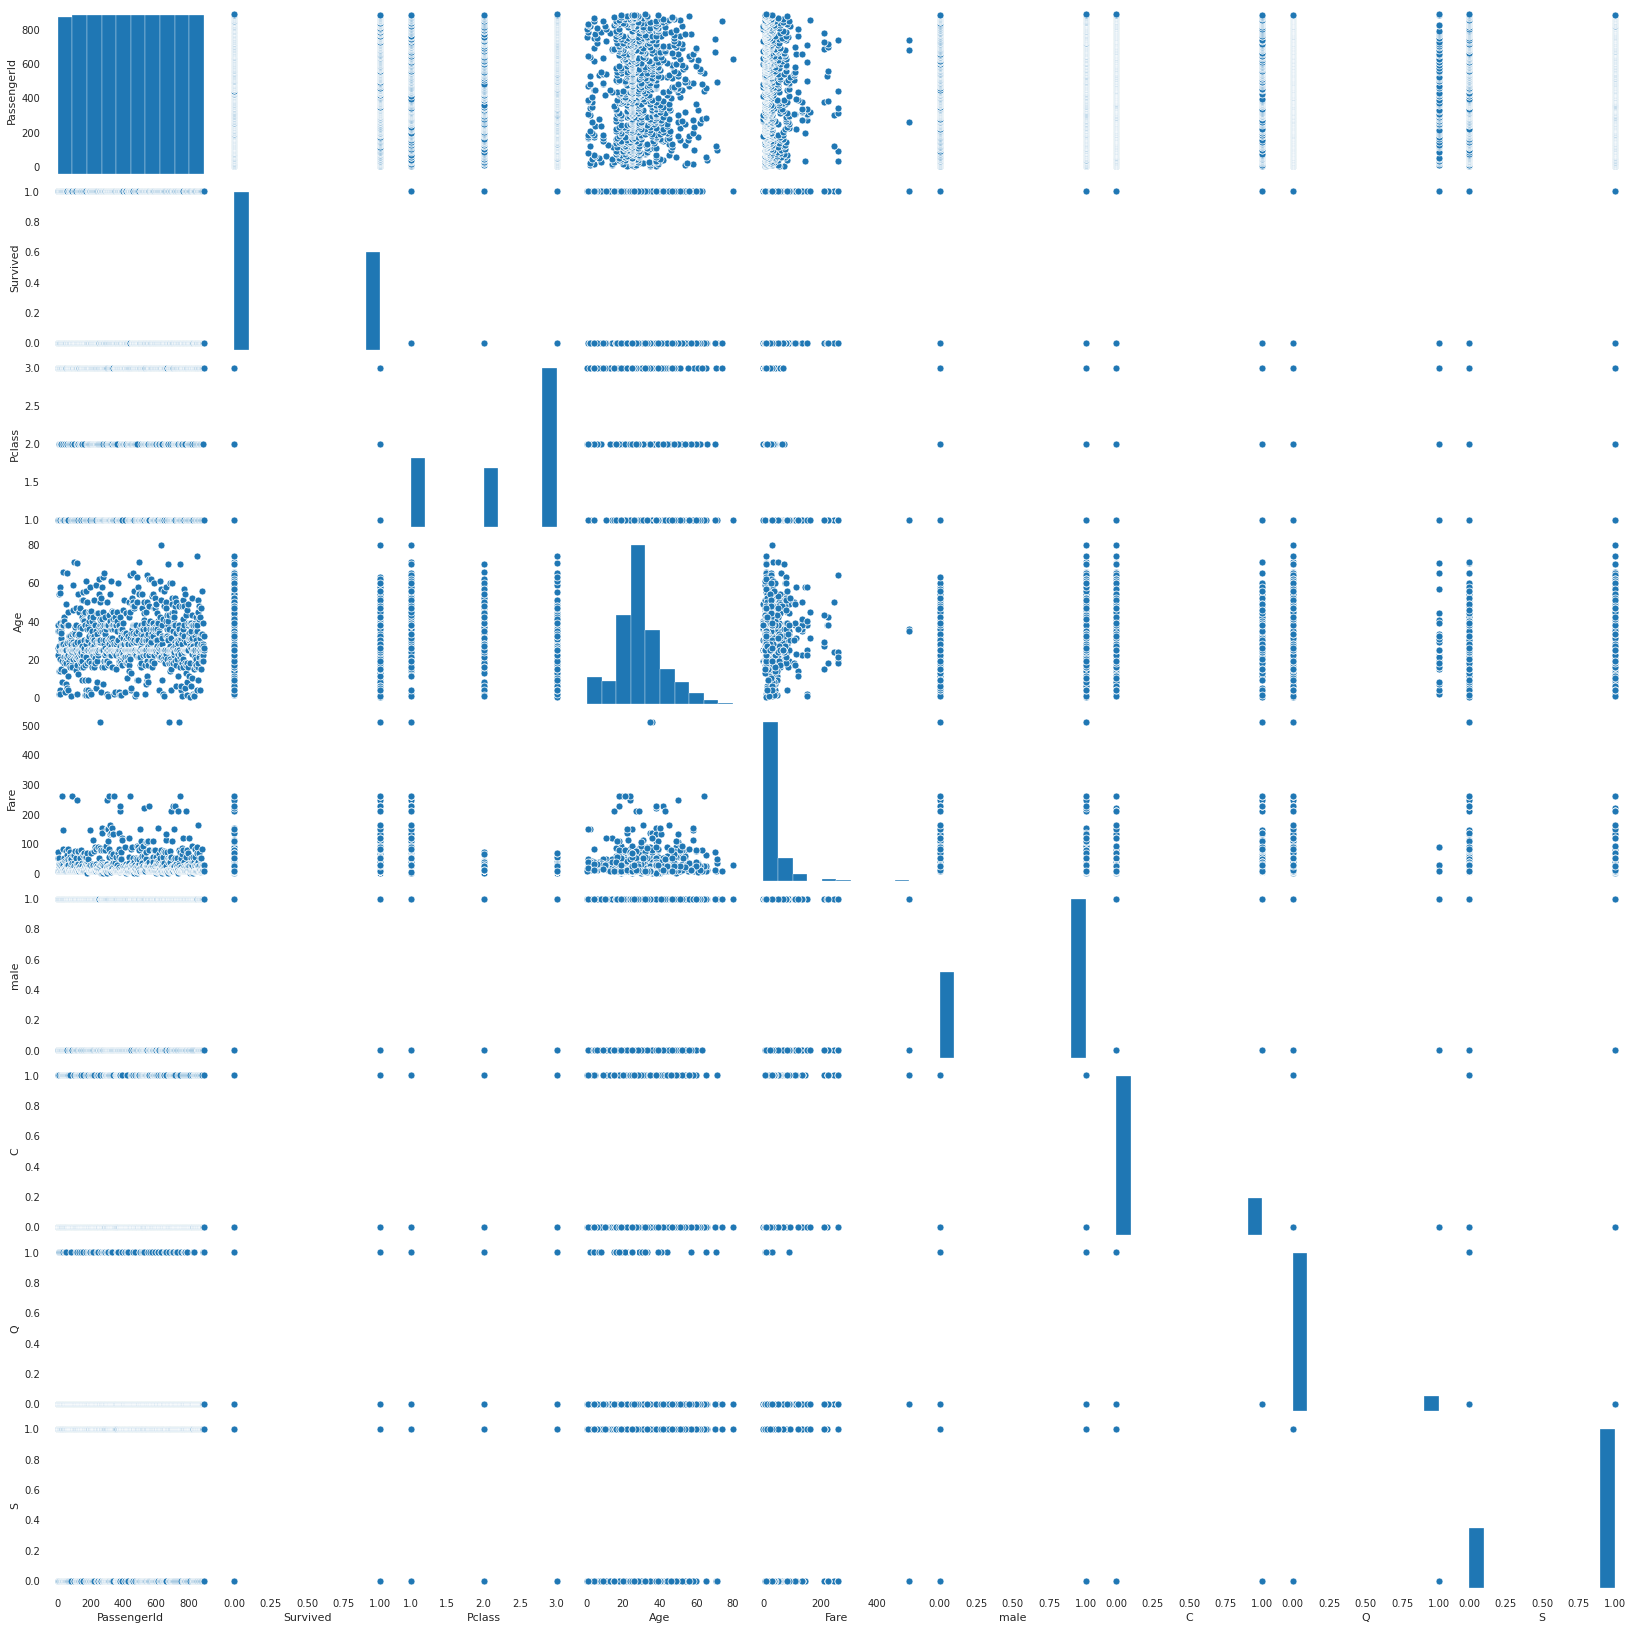

In [29]:
sns.pairplot(trainframe)

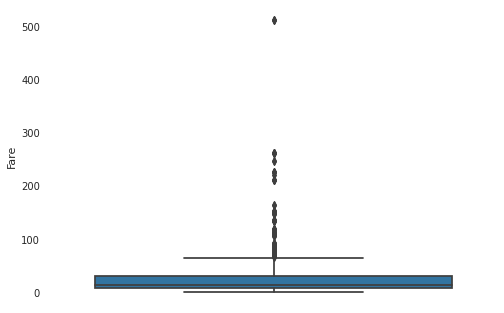

In [31]:
sns.boxplot(y='Fare', data=trainframe)

In [33]:
fareOutliers = trainframe[trainframe['Fare']>400]

In [34]:
fareOutliers

,PassengerId,Survived,Pclass,Age,Fare,male,C,Q,S
258,259,1,1,35.0,512.3292,0,1,0,0
679,680,1,1,36.0,512.3292,1,1,0,0
737,738,1,1,35.0,512.3292,1,1,0,0


In [36]:
fareOutliers = trainframe[trainframe['Fare']>400].index
trainframe = trainframe.drop(fareOutliers)

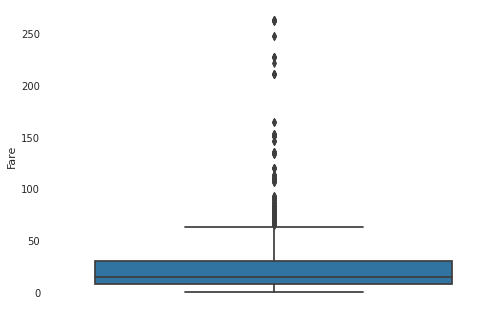

In [38]:
sns.boxplot(y='Fare', data=trainframe)

In [49]:
trainframe[trainframe['Fare']>200]['PassengerId'].nunique()

17

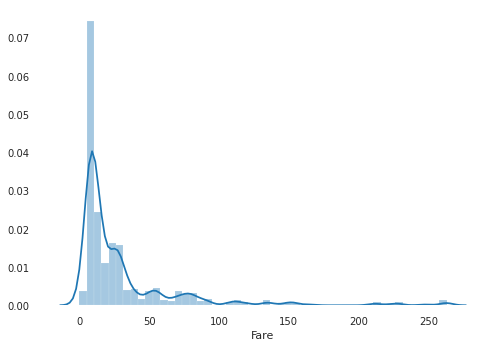

In [47]:
sns.distplot(trainframe['Fare'])

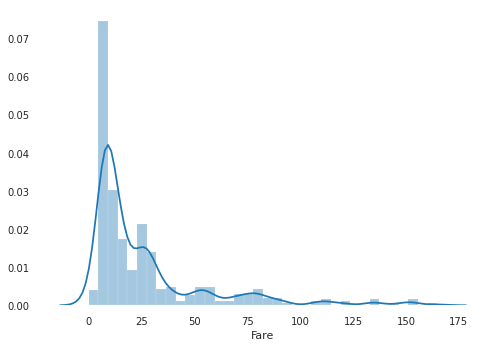

In [50]:
fareOutliers = trainframe[trainframe['Fare']>200].index
trainframe = trainframe.drop(fareOutliers)
sns.distplot(trainframe['Fare'])

In [52]:
trainframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 869 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  869 non-null    int64  
 1   Survived     869 non-null    int64  
 2   Pclass       869 non-null    int64  
 3   Age          869 non-null    float64
 4   Fare         869 non-null    float64
 5   male         869 non-null    uint8  
 6   C            869 non-null    uint8  
 7   Q            869 non-null    uint8  
 8   S            869 non-null    uint8  
dtypes: float64(2), int64(3), uint8(4)
memory usage: 44.1 KB


##Train Test Split

In [46]:
from sklearn.model_selection import train_test_split

In [53]:
X = trainframe.drop('Survived',axis=1).values
y = trainframe['Survived'].values

In [54]:
testframe = pd.read_csv('/content/drive/My Drive/Kaggle/Titanic/test.csv')

In [55]:
testframe.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [57]:
trainframe.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'Fare', 'male', 'C', 'Q',
       'S'],
      dtype='object')